# Direct Methods for the solution of Linear Systems.

1. Given a matrix $A \in {R}^{n×n}$ and the vector $x_{true} = {(1, 1, . . . , 1)}^{T} \in R^n$, write a script that:

    • Computes the right-hand side of the linear system $b = Ax_{true}$.

    • Computes the condition number in 2-norm of the matrix A. It is ill-conditioned? What if we use
    the $\infty$-norm instead of the 2-norm?

    • Solves the linear system $Ax = b$ with the function np.linalg.solve().

    • Computes the relative error between the solution computed before and the true solution $x_{true}$.
    Remember that the relative error between $x_{true}$ and x in R
    n can be computed as
    $E(x_{true}, x) = \frac{||x − x_{true}||_2}{||x_{true}||_2}$

    • Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n and (in a new
    window) the condition number in 2-norm $K_2(A)$ and in $\infty$-norm $K_{\infty}(A)$, as a function of n

In [9]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 7]

n = 100
np.random.seed(12)
v_1 = np.linspace(10, 100, 10, dtype=int)
v_2 = np.linspace(5, 30, 6, dtype=int)
v_3 = np.linspace(4, 12, 8, dtype=int)


def solve_linear(matrix_type, v):
    errors = []
    cond_infnorm = []
    cond_2norm = []
    for n_1 in v:
        if matrix_type == 'random':
            A = np.random.rand(n_1, n_1)
            s = "random matrixes"
        elif matrix_type == 'vandermonde':
            x = np.linspace(1, n_1, n_1)
            A = np.vander(x)
            s = "vandermonde matrixes"
        elif matrix_type == 'hilbert':
            A = scipy.linalg.hilbert(n_1)
            s = "hilbert matrixes"
        else:
            ValueError("Type 0 for random matrix, 1 for vander matrix, 2 for hilbert matrix")

        x_true = np.ones((n_1, 1))
        b_1 = A @ x_true
        # print(np.linalg.norm(A,2))
        # print(np.linalg.norm(A,np.inf))
        x = np.linalg.solve(A, b_1)
        error = (np.linalg.norm(x - x_true, 2)) / (np.linalg.norm(x_true, 2))
        cond2norm = np.linalg.cond(A, 2)
        condinfnorm = np.linalg.cond(A, np.inf)
        errors.append(error)
        cond_infnorm.append(cond2norm)
        cond_2norm.append(condinfnorm)

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    fig.tight_layout(pad=3.0) 
    
    ax1.title.set_text(s + " solution relative error")
    ax1.plot(v, errors, label="error")
    ax1.legend(loc='upper left')
    ax1.set_xlabel('matrix dimension')
    ax1.set_yscale('log')
    
    ax2.title.set_text(s + " conditioning numbers")
    ax2.plot(v, cond_infnorm, label="infinity norm")
    ax2.plot(v, cond_2norm, label='2-norm')
    ax2.legend(loc='upper left')
    ax2.set_xlabel('matrix dimension')
    ax2.set_yscale('log')
    
    plt.show()



2. Test the program above with the following choices of $A \in {R}^{n×n}$:

    • A random matrix (created with the function **np.random.rand()**) with size varying with $n = \{ 10,20,30,...,100\}$

    • The Vandermonde matrix (**np.vander**) of dimension $n = \{ 5,10,15,20,25,30\}$ with respect to the vector $x = \{ 1,2,3,...,n\}$

    • The Hilbert matrix (**scipy.linalg.hilbert**) of dimension $n = \{ 4,5,6,...,12\}$

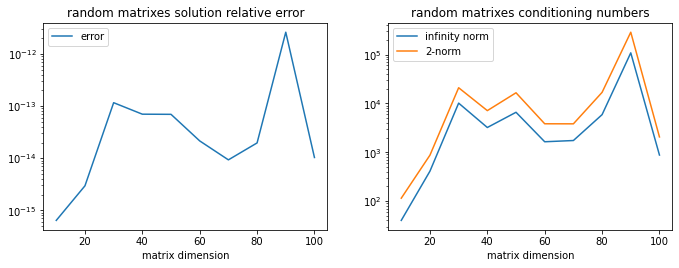

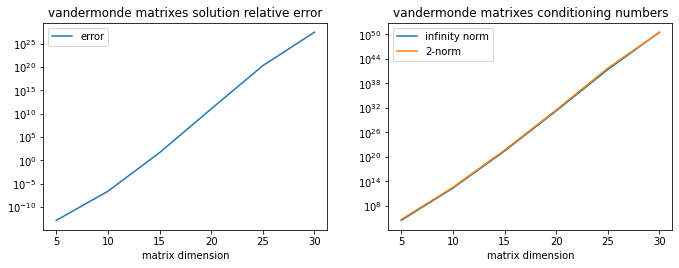

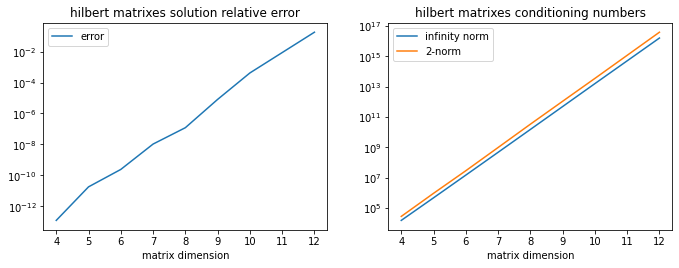

In [10]:
solve_linear('random', v_1)
solve_linear('vandermonde', v_2)
solve_linear('hilbert', v_3)

The condition number of a problem is the ratio of the relative change in the solution to the relative change in the input. A problem is well-conditioned if small relative changes in input result in small relative changes in the solution. Otherwise, the problem is ill-conditioned.


A matrix can be defined **ill conditioned** depending on the value of the conditioning number $K(A) = \| A \| \| A^{-1} \|$. Higher the conditioning number, higher the resulting perturbation on the solution. 


$$\frac{\|\Delta x \|}{\|x\|} \leq K(A) \left( \frac{\|\Delta b \|}{\|b\|}+ \frac{\|\Delta A \|}{\|A\|}\right) $$

This is a property of the matrix itself, therefore it doesn't depend on the algorithm used to solve the system.


As it is possible to see from the graphs, **Hilbert matrixes** are slightly worse than **Vandermonde matrixes**, but both of those matrix conditioning numbers become really high over a certain dimension. Otherwise, **Random Matrixes conditioning number can vary depending on the seed**. This proofs that Vandermonde and Hilbert matrix are ill conditioned. 

The $2$-norm is in most of the cases above the $\infty$-norm, but they approximately have the same behavior, in fact we know that in finite spaces holds the equivalence between the two norms.

Recall that two norms $p$ and $q$ are said "equivalent" if: 
$$c_{pq} \|x\|_q \leq \|x\|_p\leq C_{pq} \| x\|_q \quad \forall x \in V$$

where $c_{pq}$ and $C_{pq}$ are two positive constants and $V$ is a vector space

We can even show that they induce the same topology:


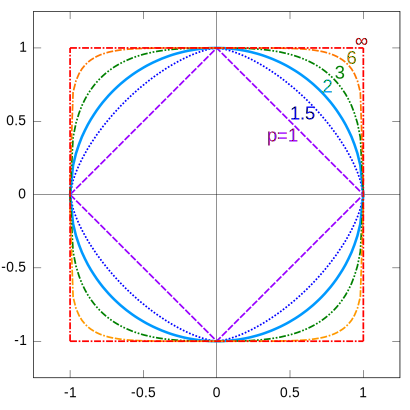

In [30]:
from IPython.display import SVG, display
display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/d/d4/Vector-p-Norms_qtl1.svg'))

###### Other factors
*note on the implementation of **np.linalg.solve(A, b)**: this method does not compute the inverse of A. Instead it calls one of the gesv LAPACK routines, which first factorizes A using LU decomposition, then solves for x using forward and backward substitution. This, as we know, is an unstable algorithm* that can introduce errors in the solution

# Floating point arithmetic

In Python just double precision floating point numbers are implemented

In [14]:
from IPython.display import Image, display
display(Image(url='https://media.geeksforgeeks.org/wp-content/uploads/Double-Precision-IEEE-754-Floating-Point-Standard-1024x266.jpg'))

## Part 1 - Machine precision
The Machine epsilon $\epsilon$ is the distance between 1 and the next floating point number. Compute $\epsilon$, which
is defined as the smallest floating point number such that it holds:
fl(1 + $\epsilon$) > 1


In [22]:
diff = 1
i=0
while 1 + diff > 1:
    i = i +  1
    diff = diff / 2
diff = diff * 2
print("epsilon value: " + str(diff))
print("iterations performed: ",i)


epsilon value: 2.220446049250313e-16
iterations performed:  53


That, as we can see, matches with the one shown by the specific python bundled function:

In [19]:
import sys
print(np.finfo(float).eps)

2.220446049250313e-16


We have divided by 2 because in computers numbers are usually in binary representation. The number of performed iterations attests that $\epsilon$ has became non-representable in the addition after 53 iterations: that's because in the IEEE standard (which is applied in python), mantissa has 52 values, so that if we fix an exponent, the epsilon value shifts one position for each iteration, unless it becomes too small to be inside the mantissa. 

$$\epsilon = 2.220446049250313 \cdot {10}^{-16}$$
$$iterations = 53$$


## Part 2 - Sequence limit
Let’s consider the sequence $a_n = {(1 + \frac{1}{n})}^n$
n. It is well known that:
$\lim_{n \to +\infty} a(n) = e$
where e is the Euler costant. Choose different values for $n$, compute $a_n$ and compare it to the real
value of the Euler costant. What happens if you choose a large value of $n$? Guess the reason

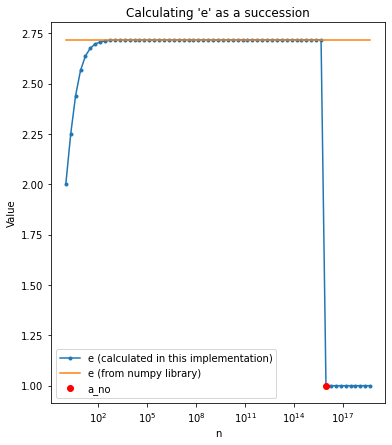

In [24]:
e = []
x = []
i = 1
a_n = (1 + (1 / i)) ** i

# iterations to do over the reaching of a_n = 1, just to show the points in the plot
over_iter = 10

while (a_n != 1) or (over_iter>0):
    x.append(i)
    a_n = (1 + (1/i)) ** i
    e.append(a_n)
    i = i * 2
    
    if (a_n == 1):
        if (over_iter == 10):
            x_pos = x[-1]
            y_pos = e[-1]
        over_iter = over_iter - 1
    
    

plt.plot(x, e, '.-', label="e (calculated in this implementation)")
plt.plot(x, np.ones(len(e)) * np.e,label="e (from numpy library)")
plt.title("Calculating 'e' as a succession")
plt.xlabel("n")
plt.ylabel("Value")
plt.xscale("log")
#hold on;
plt.plot(x_pos,y_pos,'ro', label = 'a_no')
plt.legend()
plt.show()



$$a_n = {(1 + \frac{1}{n})}^n$$

$$\lim_{n \to +\infty} a(n) = e$$

In practice, when $\frac{1}{n}$ becomes smaller than the machine precision it is no longer representable and that same fraction becomes undistinguishable from 0, therefore for each $n > n_o$ (with $n_o$ following this relation: $\frac{1}{n_o} < \epsilon$) we have $$a_n = (1)^n = 1$$  
What happens is similar to the previous example, therefore this is caused by finite arithmetics

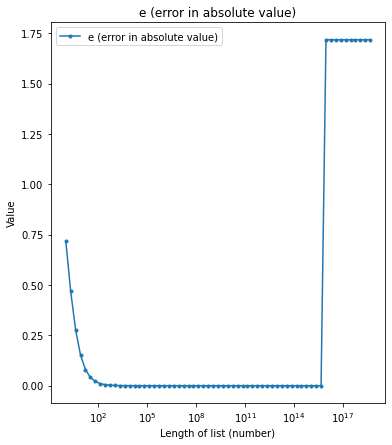

In [29]:
err = abs((np.ones(len(e))* np.e) - e)

plt.plot(x, err, '.-', label="e (error in absolute value)")
plt.title("e (error in absolute value)")
plt.xlabel("Length of list (number)")
plt.ylabel("Value")
plt.xscale("log")
plt.legend()
plt.show()

## Part 3 - Rank & eigenvalues
Let's consider the matrices:$$ A = \left(\begin{array}{cc} 4 & 2\\ 1 & 3 \end{array}\right), B = \left(\begin{array}{cc} 4 & 2\\ 2 & 1 \end{array}\right)$$ $$ $$ Compute the rank of **A** and **B** and their eigenvalues. Are **A** and **B** full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples.$$ $$ *Tips:* Please, have a look at **np.linalg**.

In [5]:

A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

print("Matrix A   Rank: " + str(np.linalg.matrix_rank(A))+ "         Maximum rank possible: " + str(min(A.shape)) + "  Eigenvalues: " + str(np.linalg.eig(A)[0]))
print("Matrix B   Rank: " + str(np.linalg.matrix_rank(B))+ "         Maximum rank possible: " + str(min(B.shape)) + "  Eigenvalues: " + str(np.linalg.eig(B)[0]))
print("\n")

C = np.array([[0, 0, 1], [0, 1, 0], [0, 4, 4]])
D = np.array([[0, 4, 0], [1, 0, 0], [3, 7, 9]])
print("Matrix C   Rank: " + str(np.linalg.matrix_rank(C))+ "         Maximum rank possible: " + str(min(C.shape)) + "  Eigenvalues: " + str(np.linalg.eig(C)[0]))
print("Matrix D   Rank: " + str(np.linalg.matrix_rank(D))+ "         Maximum rank possible: " + str(min(D.shape)) + "  Eigenvalues: " + str(np.linalg.eig(D)[0]))

Matrix A   Rank: 2         Maximum rank possible: 2  Eigenvalues: [5. 2.]
Matrix B   Rank: 1         Maximum rank possible: 2  Eigenvalues: [5. 0.]


Matrix C   Rank: 2         Maximum rank possible: 3  Eigenvalues: [0. 4. 1.]
Matrix D   Rank: 3         Maximum rank possible: 3  Eigenvalues: [ 9.  2. -2.]


Here, the maximum rank is 2, but just $rank(A) = rank_{max}(A)$, while $rank(B) < rank_{max}(B)$
 
We know that given a matrix $M$, 
$$ rank(M)=rank_{max}(M) \Leftrightarrow det(M)\neq 0$$ 

and $$det(M) = \prod_{i \in \sigma_M}{\lambda_i}$$ so 
$$rank(M) = rank_{max}(A)\Rightarrow det(M) \neq 0 \Rightarrow \lambda_i \neq 0 \quad \forall i$$
and
$$rank(M) \neq rank_{max}(A)\Rightarrow det(M) = 0 \Rightarrow \exists i \quad \lambda_i = 0  \quad $$